In [4]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
import os
import matplotlib.pyplot as plt
import copy # needed for deepcopy of dictionaries
from matplotlib.lines import Line2D # for custom legend
from matplotlib_scalebar.scalebar import ScaleBar
from datetime import datetime # to print timing of cells

plt.rcParams['svg.fonttype'] = 'none'

from skimage.filters import threshold_otsu # threshold method used to threshold inj site


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2
# Set-up variables


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:

# home_dir = "/Volumes/Data/"
home_dir = "/mnt/labNAS/"

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
# out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"
out_path = "/mnt/labNAS/Emily/STP_for_MAPseq/4_python_output/output_figs/"

# load metadata
metadata = pd.read_csv("stp_metadata.csv")



In [11]:
start = datetime.now()
# import masks for each brain in order of metadata
# create list of dictionaries containing masks
areas = ["grey", "CTX", "STR", "CP","BS"]

all_masks = []

for i in range(metadata.shape[0]):
    brain = metadata.loc[i, "brain"]
    print("\n","working on", brain)
    masks_folder = in_path+"masks/"+brain+"_masks/"

    masks = {}
    for area in areas:
        print("working on", area)
        with open(masks_folder+brain+"_"+area+".npy", "rb") as f:
            masks[area] = np.load(f)

    all_masks.append(masks)

print(datetime.now()-start)

len(all_masks)

working on ACC_MMus_230403_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on ACC_MMus_230404_b2
working on grey
working on CTX
working on STR
working on CP
working on BS
working on ACC_MMus_230427_b3
working on grey
working on CTX
working on STR
working on CP
working on BS
working on ACC_STeg_230308_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on ACC_STeg_230322_b2
working on grey
working on CTX
working on STR
working on CP
working on BS
working on ACC_STeg_230501_b3
working on grey
working on CTX
working on STR
working on CP
working on BS
working on OMC_MMus_220119_b0
working on grey
working on CTX
working on STR
working on CP
working on BS
working on OMC_MMus_220303_b1
working on grey
working on CTX
working on STR
working on CP
working on BS
working on OMC_MMus_220324_b2
working on grey
working on CTX
working on STR
working on CP
working on BS
working on OMC_STeg_220208_b0
working on grey
working on CTX
wor

12

In [19]:
test = all_masks[0]
voxel_size = 0.05*0.02*0.02

grey_sum = test['grey'].sum()
grey_sum*voxel_size

404.92986

In [23]:
test["grey"]

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

[6.4 4.8]


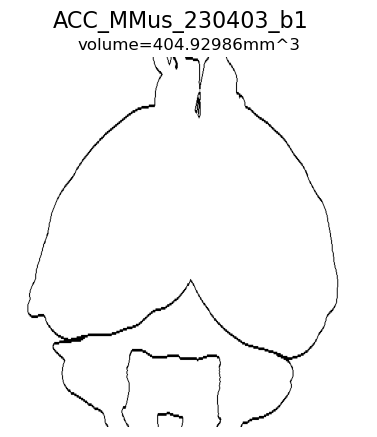

[6.4 4.8]


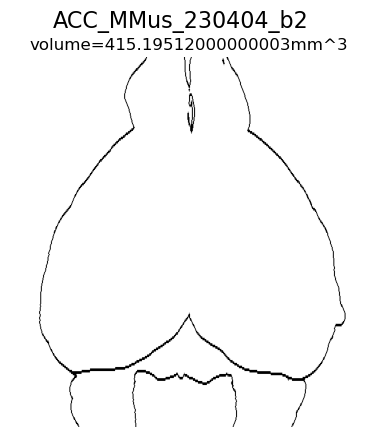

[6.4 4.8]


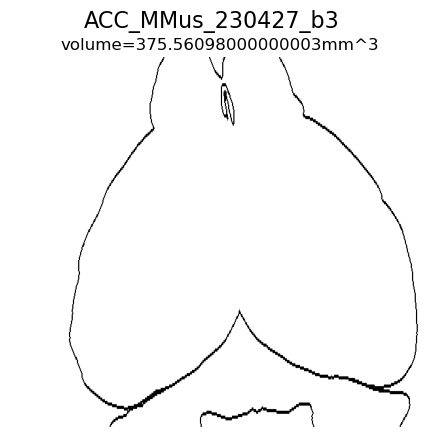

[6.4 4.8]


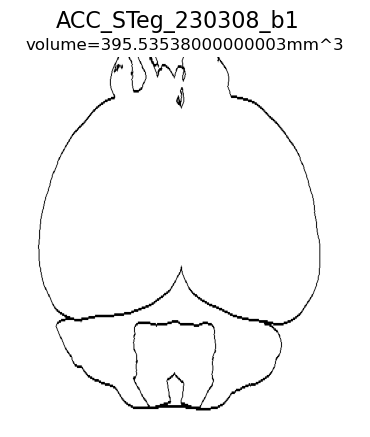

[6.4 4.8]


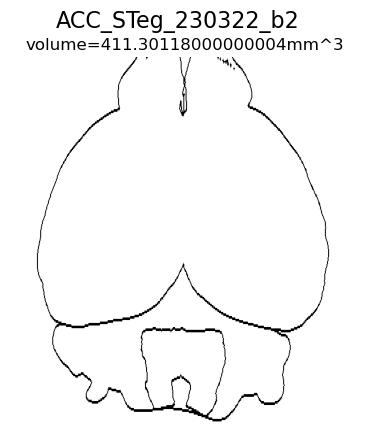

[6.4 4.8]


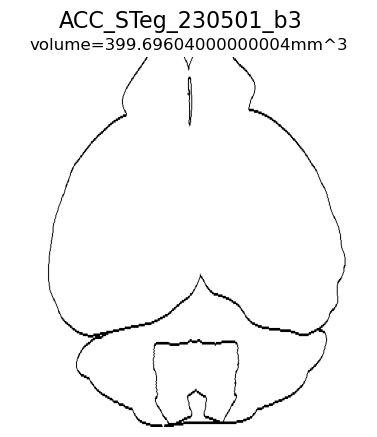

[6.4 4.8]


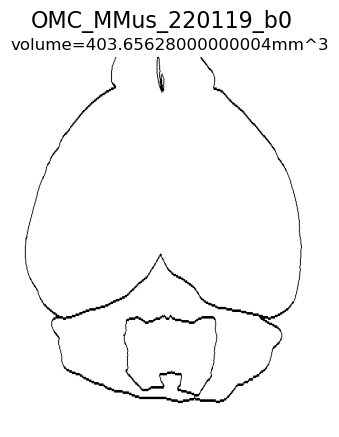

[6.4 4.8]


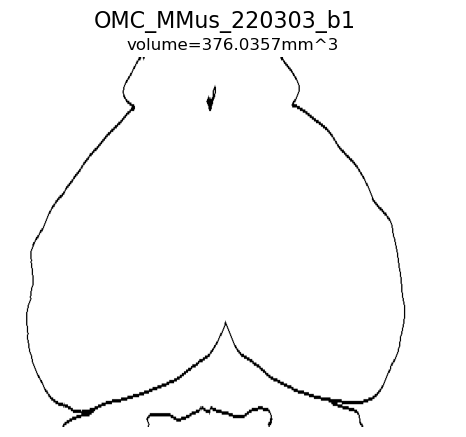

[6.4 4.8]


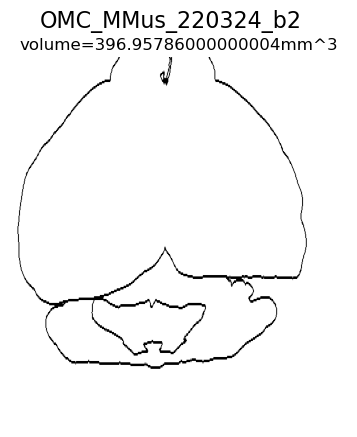

[6.4 4.8]


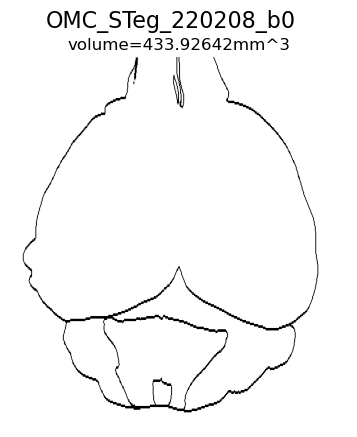

[6.4 4.8]


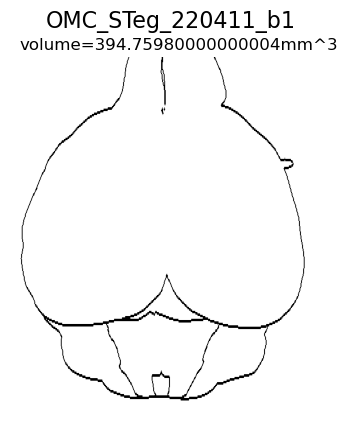

[6.4 4.8]


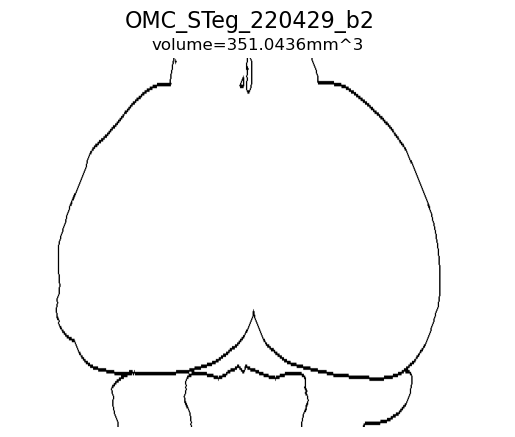

In [45]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# create outlines of each brain
for i in range(metadata.shape[0]):
    metadata.loc[i,'brain']
    mask = all_masks[i]
    grey_sum = mask['grey'].sum()
    volume = grey_sum*voxel_size

    plot_contour(images=None, mask_dict=mask, masks_to_plot=mask_order, view="top")
    plt.suptitle(metadata.loc[i,"brain"], size=16)
    plt.title("volume="+str(volume)+"mm^3")
    
    plt.show()

/home/emily/.conda/envs/napari/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/emily/.conda/envs/napari/lib/python3.11/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


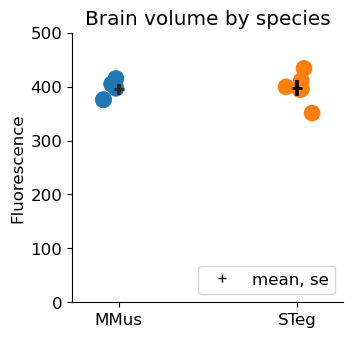

In [49]:
mask_order = ["grey", "BS", "STR", "CP", "CTX"]
voxel_size = 0.05*0.02*0.02

# create outlines of each brain
for i in range(metadata.shape[0]):
    metadata.loc[i,'brain']
    mask = all_masks[i]
    grey_sum = mask['grey'].sum()
    volume = grey_sum*voxel_size
    metadata.loc[i,'volume'] = volume

dot_plot_by_species(metadata, to_plot="volume")
plt.ylim(0,500)
plt.title("Brain volume by species")
plt.show()